<a href="https://colab.research.google.com/github/rooshanriaz/CS-351L-AI-Lab-GitHub-Repository_2022506/blob/main/Rooshan_Riaz_CS351L_Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Schedule: {'Alice': 'Movie', 'Bob': 'Dinner', 'Charlie': 'Sports Event', 'Diana': 'Game Night'}


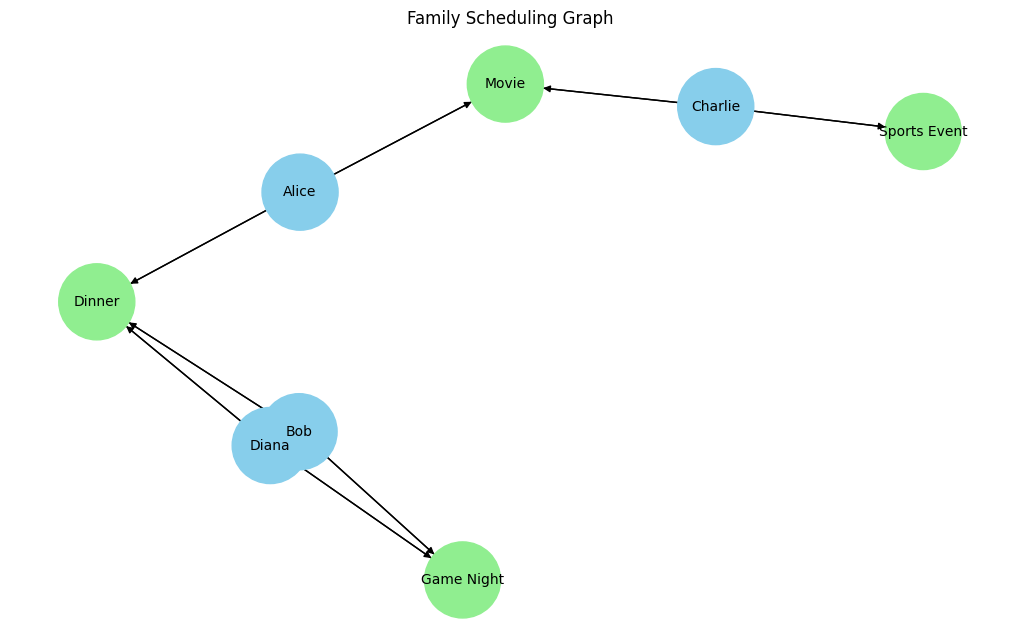

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the family members, activities, and their availability
members = ['Alice', 'Bob', 'Charlie', 'Diana']
activities = ['Dinner', 'Movie', 'Game Night', 'Sports Event']

# Availability constraints
availability = {
    'Alice': ['Dinner', 'Movie'],
    'Bob': ['Dinner', 'Game Night'],
    'Charlie': ['Movie', 'Sports Event'],
    'Diana': ['Dinner', 'Game Night']
}

# Create a directed graph
G = nx.DiGraph()

# Add family members and activities as nodes
for member in members:
    G.add_node(member, type='member')

for activity in activities:
    G.add_node(activity, type='activity')

# Add edges representing possible assignments
for member in members:
    for activity in availability[member]:
        G.add_edge(member, activity)

# Heuristic function to choose the next member
def select_next_member(schedule):
    unassigned_members = [m for m in members if m not in schedule]
    # Choose the member with the least available activities
    return min(unassigned_members, key=lambda m: len(availability[m]))

# Check if current schedule is valid
def is_valid_schedule(schedule):
    assigned_activities = set(schedule.values())
    return len(assigned_activities) == len(schedule)

# Backtracking algorithm with heuristic
def schedule_activities(schedule):
    if len(schedule) == len(members):
        return schedule  # All members are scheduled

    member = select_next_member(schedule)
    for activity in availability[member]:
        if activity not in schedule.values():  # Ensure activity is not already assigned
            schedule[member] = activity  # Assign activity
            if is_valid_schedule(schedule):
                result = schedule_activities(schedule)
                if result:
                    return result
            del schedule[member]  # Backtrack
    return None

# Visualize the graph
def visualize_graph():
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    # Draw nodes
    node_colors = ['skyblue' if G.nodes[n]['type'] == 'member' else 'lightgreen' for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_color='black')

    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10)

    plt.title('Family Scheduling Graph')
    plt.axis('off')  # Hide axes
    plt.show()

# Main execution
if __name__ == "__main__":
    schedule = {}
    final_schedule = schedule_activities(schedule)

    if final_schedule:
        print("Final Schedule:", final_schedule)
    else:
        print("No valid schedule found.")

    visualize_graph()


Final Activity Schedule: {'Dinner': 'Friday 7 PM', 'Movie': 'Saturday 8 PM', 'Game Night': 'Friday 8 PM', 'Sports Event': 'Saturday 5 PM'}


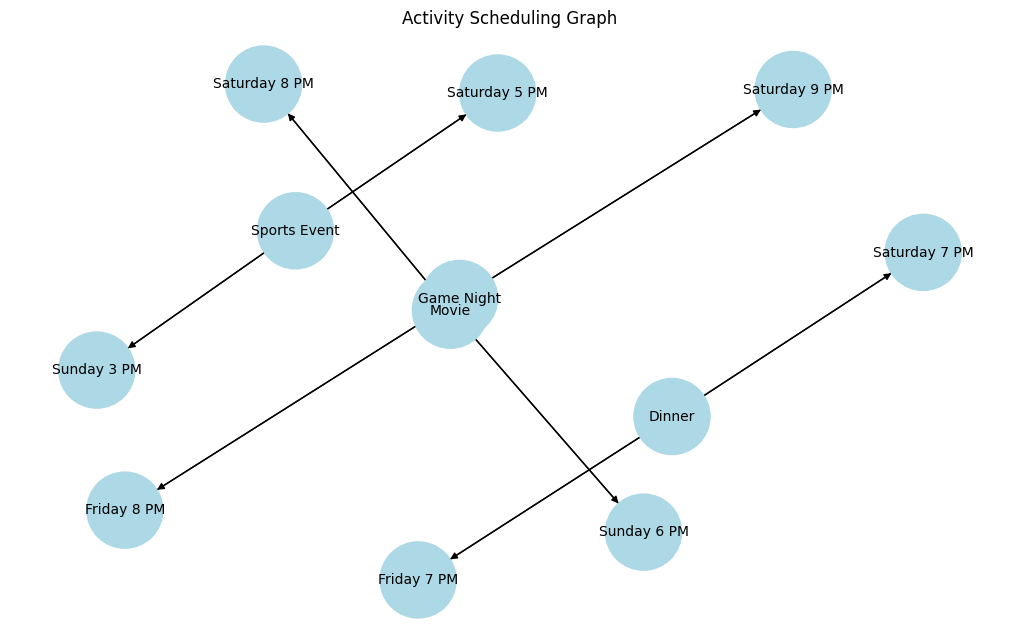

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the activities and their time slots
activities = {
    'Dinner': ['Friday 7 PM', 'Saturday 7 PM'],
    'Movie': ['Saturday 8 PM', 'Sunday 6 PM'],
    'Game Night': ['Friday 8 PM', 'Saturday 9 PM'],
    'Sports Event': ['Saturday 5 PM', 'Sunday 3 PM']
}

# Define constraints for each activity
constraints = {
    'Dinner': ['Game Night'],  # Cannot have Dinner and Game Night on Friday
    'Movie': [],                # No constraints
    'Game Night': ['Dinner'],   # Cannot have Game Night after Dinner on Friday
    'Sports Event': []          # No constraints
}

# Create a directed graph
G = nx.DiGraph()

# Add activities as nodes
for activity in activities:
    G.add_node(activity, type='activity')

# Add edges representing possible scheduling
for activity, times in activities.items():
    for time in times:
        G.add_edge(activity, time)

# Heuristic function to select the next activity to schedule
def select_next_activity(schedule):
    unscheduled_activities = [a for a in activities if a not in schedule]
    # Choose the activity that has the least available time slots
    return min(unscheduled_activities, key=lambda a: len(activities[a]))

# Check if the current schedule is valid
def is_valid_schedule(schedule):
    scheduled_times = set(schedule.values())
    # Check for conflicts with constraints
    for activity, conflicted_activities in constraints.items():
        if activity in schedule:
            for conflicted_activity in conflicted_activities:
                if conflicted_activity in schedule:
                    if schedule[activity] == schedule[conflicted_activity]:
                        return False
    return True

# Backtracking algorithm with heuristic
def schedule_activities(schedule):
    if len(schedule) == len(activities):
        return schedule  # All activities are scheduled

    activity = select_next_activity(schedule)
    for time in activities[activity]:
        schedule[activity] = time  # Assign time slot
        if is_valid_schedule(schedule):
            result = schedule_activities(schedule)
            if result:
                return result
        del schedule[activity]  # Backtrack
    return None

# Visualize the graph
def visualize_graph():
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    # Draw nodes
    node_colors = ['lightblue' for _ in G.nodes()]  # All activities
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_color='black')

    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10)

    plt.title('Activity Scheduling Graph')
    plt.axis('off')  # Hide axes
    plt.show()

# Main execution
if __name__ == "__main__":
    schedule = {}
    final_schedule = schedule_activities(schedule)

    if final_schedule:
        print("Final Activity Schedule:", final_schedule)
    else:
        print("No valid schedule found.")

    visualize_graph()


Final Activity Schedule:
Alice: Dinner at Friday 7 PM
Bob: Dinner at Saturday 7 PM
Charlie: Movie at Saturday 8 PM
Diana: Game Night at Friday 8 PM


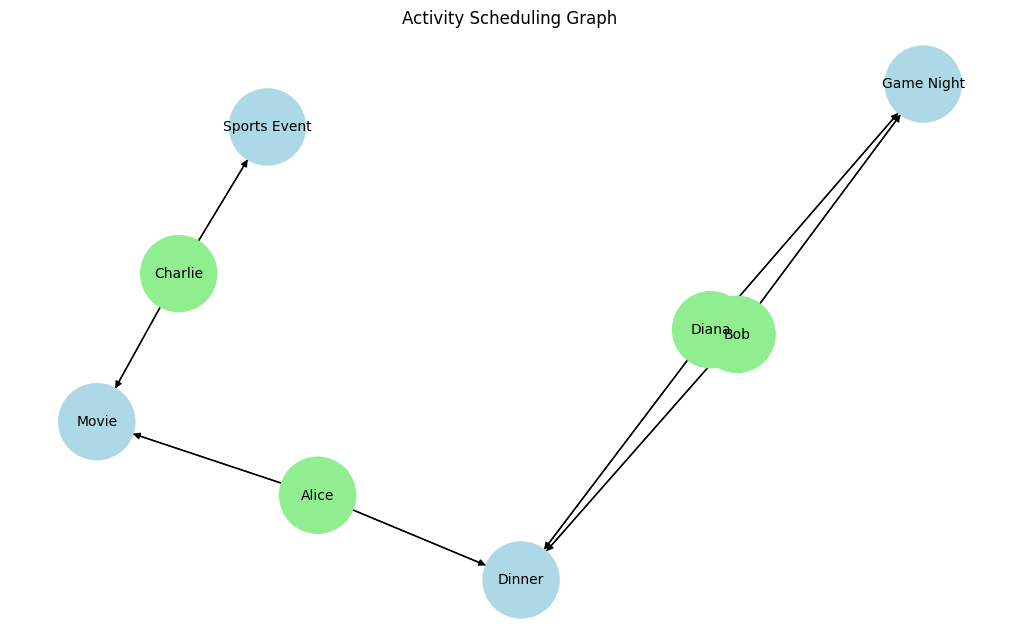

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define individuals and their availability
individuals = {
    'Alice': ['Dinner', 'Movie'],
    'Bob': ['Dinner', 'Game Night'],
    'Charlie': ['Movie', 'Sports Event'],
    'Diana': ['Dinner', 'Game Night']
}

# Define activities and their time slots
activities = {
    'Dinner': ['Friday 7 PM', 'Saturday 7 PM'],
    'Movie': ['Saturday 8 PM', 'Sunday 6 PM'],
    'Game Night': ['Friday 8 PM', 'Saturday 9 PM'],
    'Sports Event': ['Saturday 5 PM', 'Sunday 3 PM']
}

# Define constraints for activities
constraints = {
    'Dinner': ['Game Night'],  # Cannot have Dinner and Game Night on Friday
    'Movie': [],
    'Game Night': ['Dinner'],   # Cannot have Game Night after Dinner on Friday
    'Sports Event': []
}

# Create a directed graph
G = nx.DiGraph()

# Add activities and individuals as nodes
for activity in activities:
    G.add_node(activity, type='activity')

for individual in individuals:
    G.add_node(individual, type='individual')

# Add edges representing possible assignments (individual to activity)
for individual, available_activities in individuals.items():
    for activity in available_activities:
        G.add_edge(individual, activity)

# Check if the current schedule is valid
def is_valid_schedule(schedule):
    scheduled_times = {}
    for individual, (activity, time) in schedule.items():
        if time in scheduled_times:
            return False  # Conflict in time slots
        scheduled_times[time] = activity

    # Check for activity constraints
    for activity, conflicted_activities in constraints.items():
        if activity in schedule.values():
            for conflicted_activity in conflicted_activities:
                if conflicted_activity in schedule.values():
                    if (schedule[activity][1] == schedule[conflicted_activity][1]):  # Same time
                        return False
    return True

# Backtracking algorithm with heuristic
def schedule_activities(schedule):
    if len(schedule) == len(individuals):
        return schedule  # All individuals are scheduled

    for individual in individuals:
        if individual not in schedule:  # If individual is not yet scheduled
            for activity in individuals[individual]:
                for time in activities[activity]:
                    # Create a temporary assignment
                    temp_schedule = schedule.copy()
                    temp_schedule[individual] = (activity, time)

                    if is_valid_schedule(temp_schedule):
                        result = schedule_activities(temp_schedule)
                        if result is not None:
                            return result

            # If no valid assignment is found, backtrack by removing the individual from the schedule
            return None
    return None

# Visualize the graph
def visualize_graph():
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    # Draw nodes
    node_colors = ['lightblue' if G.nodes[n]['type'] == 'activity' else 'lightgreen' for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_color='black')

    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10)

    plt.title('Activity Scheduling Graph')
    plt.axis('off')  # Hide axes
    plt.show()

# Main execution
if __name__ == "__main__":
    schedule = {}
    final_schedule = schedule_activities(schedule)

    if final_schedule:
        print("Final Activity Schedule:")
        for individual, (activity, time) in final_schedule.items():
            print(f"{individual}: {activity} at {time}")
    else:
        print("No valid schedule found.")

    visualize_graph()
